In [1]:
# Pandas kütüphanesini 'pd' kısaltmasıyla içe aktarın
import pandas as pd
# Numpy kütüphanesini 'np' kısaltmasıyla içe aktarın
import numpy as np
# Matplotlib kütüphanesinin 'pyplot' modülünü 'plt' kısaltmasıyla içe aktarın
import matplotlib.pyplot as plt
# Seaborn kütüphanesini 'sns' kısaltmasıyla içe aktarın
import seaborn as sns

In [3]:
# Kaggle'da bulunan Pokemon veri setini okuyun ve 'data' adında bir DataFrame'e atayın
data = pd.read_csv("Pokemon.csv")

In [4]:
# 'data' DataFrame'inin ilk 5 satırını görüntüleyin
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
# 'data' DataFrame'inin satır sayısını hesaplayın ve toplam pokemon sayısını öğrenin
len(data)

800

In [6]:
# 'data' DataFrame'inin temel istatistiklerini hesaplayın ve özetleyin
data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Pokemon Türlerinin Dağılımı:
Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64


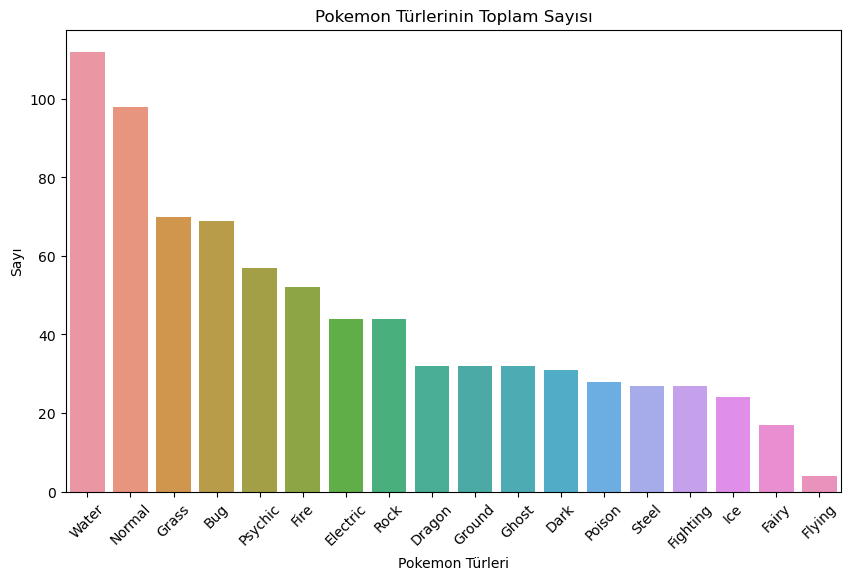

In [7]:
# 1. Pokemon Türlerinin Dağılımını inceleyin

# 'Type 1' sütunundaki farklı Pokemon türlerinin sayısını hesaplayın
pokemon_type_counts = data['Type 1'].value_counts()

# Pokemon Türlerinin Dağılımını ekrana yazdırın
print("Pokemon Türlerinin Dağılımı:")
print(pokemon_type_counts)

# Pokemon türlerinin toplam sayısını görselleştirmek için bir çubuk grafik çizin
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Type 1', order=data['Type 1'].value_counts().index)
plt.title('Pokemon Türlerinin Toplam Sayısı')
plt.xlabel('Pokemon Türleri')
plt.ylabel('Sayı')
plt.xticks(rotation=45)
plt.show()


Jenerasyonların Sayıları:
Generation
1    166
5    165
3    160
4    121
2    106
6     82
Name: count, dtype: int64


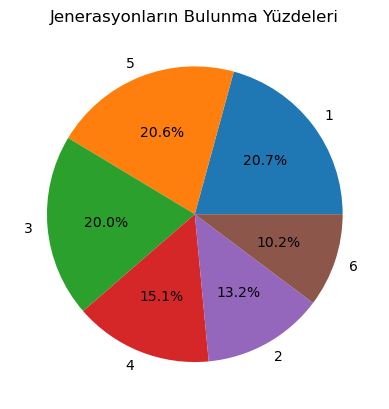

In [8]:
# 2. Jenerasyonların Karşılaştırılması

# 'Generation' sütunundaki farklı jenerasyonların sayısını hesaplayın
generation_counts = data['Generation'].value_counts()

# Jenerasyonların Sayılarını ekrana yazdırın
print("\nJenerasyonların Sayıları:")
print(generation_counts)

# Pokemon'un nesillere göre dağılımını görselleştirmek için bir pasta grafiği çizin
generation_counts = data["Generation"].value_counts()
generation_counts.plot.pie(autopct="%1.1f%%")
plt.title('Jenerasyonların Bulunma Yüzdeleri')
plt.ylabel('')
plt.show()

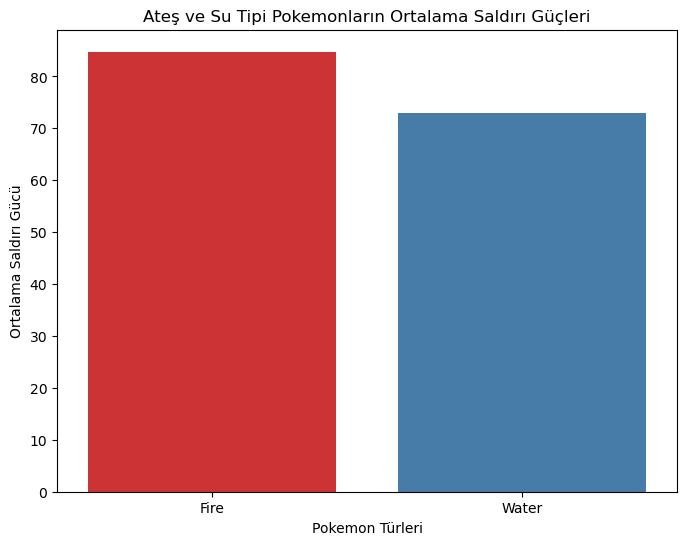

In [13]:
# 3. Ateş ve su tipi Pokemonların  Ortalama Saldırı Güçlerinin Karşılaştırması
fire_type = data[data["Type 1"] == "Fire"]
water_type = data[data["Type 1"] == "Water"]

# Ateş ve su tipi Pokemon'ların ortalama saldırı ve savunma istatistiklerini hesaplayın
fire_attack_mean = fire_type["Attack"].mean()
water_defense_mean = water_type["Defense"].mean()

# Histogram gösterimi için veri hazırlığı
data_for_hist = pd.DataFrame({'Type': ['Fire', 'Water'],
                              'Stat': [fire_attack_mean, water_defense_mean]})

# Histogramı çizin
plt.figure(figsize=(8, 6))
sns.barplot(data=data_for_hist, x='Type', y='Stat', palette='Set1')
plt.title('Ateş ve Su Tipi Pokemonların Ortalama Saldırı Güçleri')
plt.xlabel('Pokemon Türleri')
plt.ylabel('Ortalama Saldırı Gücü')
plt.show()

<Figure size 1000x600 with 0 Axes>

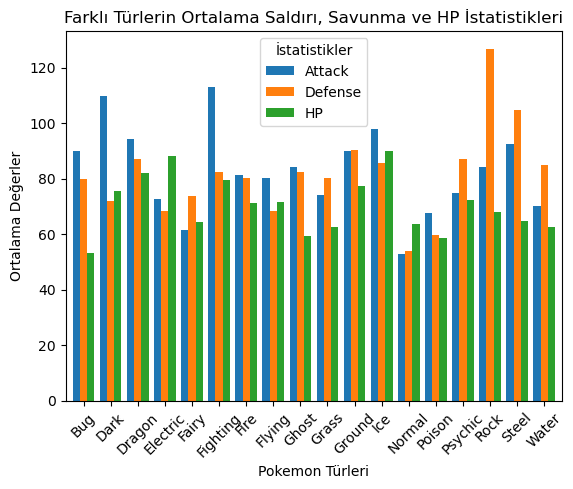

In [22]:
# 4. Farklı Türlerin Saldırı, Savunma ve HP İstatistiklerinin Karşılaştırması
type2_stats = data.groupby("Type 2").agg({"Attack": "mean", "Defense": "mean", "HP": "mean"})

# Grafiği daha da genişletmek için figür boyutunu ayarlayın
plt.figure(figsize=(10, 6))

# Bar grafiği çizin
type2_stats.plot(kind='bar', width=0.8)

# Grafiğin başlığını ve eksen etiketlerini ayarlayın
plt.title('Farklı Türlerin Ortalama Saldırı, Savunma ve HP İstatistikleri')
plt.xlabel('Pokemon Türleri')
plt.ylabel('Ortalama Değerler')
plt.xticks(rotation=45)  # X eksenindeki etiketleri 45 derece döndürün
plt.legend(title='İstatistikler')  # Grafikteki legend'ı ayarlayın

# Grafiği gösterin
plt.show()